<a href="https://colab.research.google.com/github/mark3000-010701/Dataanalyst/blob/main/Th%E1%BB%B1c_h%C3%A0nh_Data_Visualization_1'_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[Thực hành] Trực quan hóa cơ bản dữ liệu Food Price in Turkey**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
d = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data-DataAnalyst-CodeGym/FoodPrice_in_Turkey (1).csv")

Chọn dữ liệu cần thiết cho mục tiêu 1.

In [3]:
data1 = d[(d['Year'] == 2019) & (d['Month'] == 12) & (d['ProductName'] == 'Rice - Retail')]


Vẽ biểu đồ cột

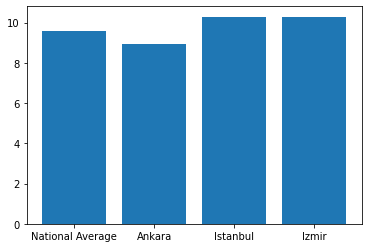

In [4]:
plt.bar(data1['Place'], data1['Price'])
plt.show()

Tinh chỉnh thuộc tính biểu đồ

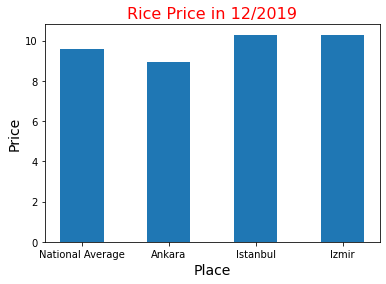

In [5]:
plt.bar(data1['Place'], data1['Price'], width = 0.5)
plt.title('Rice Price in 12/2019', fontsize = 16, color = 'r')
plt.xlabel('Place', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.show()

Chọn dữ liệu cần thiết cho mục tiêu 2

In [6]:
data2 = d[(d['Place'] == 'National Average') & (d['Year'] == 2019) & (d['ProductName'] == 'Rice - Retail')]


Vẽ biểu đồ đường

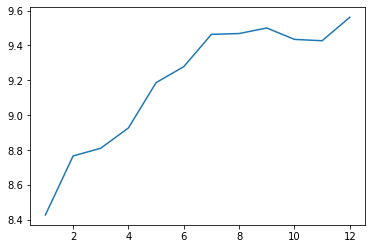

In [7]:
plt.plot(data2['Month'], data2['Price'])
plt.show()

Tinh chỉnh thuộc tính biểu đồ đường

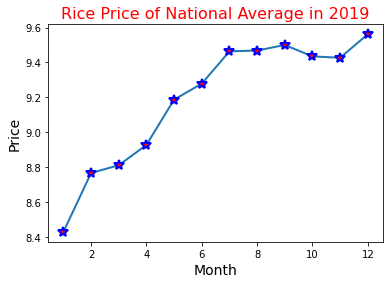

In [8]:
plt.plot(data2['Month'], data2['Price'], linewidth = 2, marker = '*', markersize=10, markerfacecolor='red', markeredgecolor = 'blue', markeredgewidth=2)
plt.title('Rice Price of National Average in 2019', fontsize = 16, color = 'r')
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.show()

Chọn dữ liệu cần thiết cho mục tiêu 3

In [9]:
x = d[(d['Place'] == 'National Average') & (d['ProductName'] == 'Fuel (gas) - Retail') & (d['Year'] == 2019)]
y = d[(d['Place'] == 'National Average') & (d['ProductName'] == 'Rice - Retail') & (d['Year'] == 2019)]

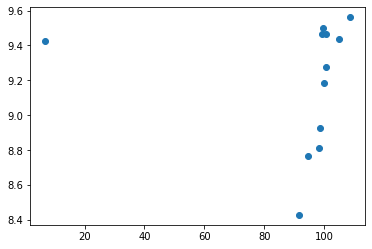

In [10]:
plt.scatter(x['Price'], y['Price'])
plt.show()

Tinh chỉnh biểu đồ Scatter

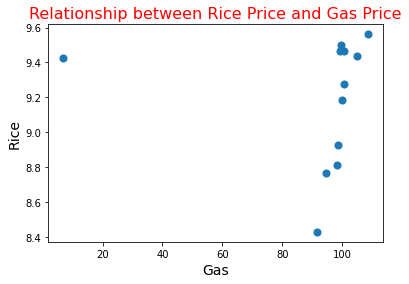

In [11]:
plt.scatter(x['Price'], y['Price'], s = 50)
plt.title('Relationship between Rice Price and Gas Price', fontsize = 16, color = 'r')
plt.xlabel('Gas', fontsize = 14)
plt.ylabel('Rice', fontsize = 14)
plt.show()

# **[Thực hành] Phân tích sự biến đổi nhiệt độ theo thời gian**

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2022/02/16091503/daily-min-temperatures.csv")

Hiển thị các giá trị thống kê của dữ liệu nhiệt độ

In [15]:
df['Temp'].describe()

count    3650.000000
mean       11.177753
std         4.071837
min         0.000000
25%         8.300000
50%        11.000000
75%        14.000000
max        26.300000
Name: Temp, dtype: float64

Vẽ biểu đồ Histogram

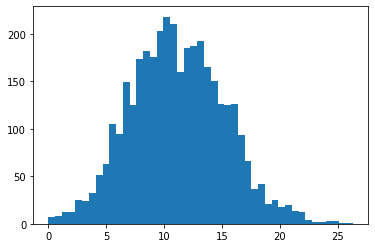

In [16]:
plt.hist(df['Temp'], bins = 45)
plt.show()

Tinh chỉnh biểu đồ

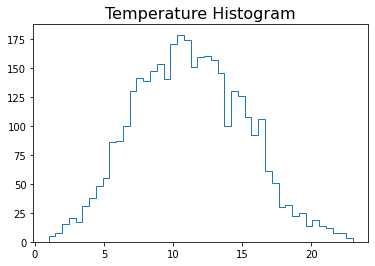

In [17]:
plt.hist(df['Temp'], bins = 45, range = (1, 23), histtype = 'step')
plt.title('Temperature Histogram', fontsize = 16)
plt.show()

Vẽ biểu đồ đường thể hiện xu hướng nhiệt độ

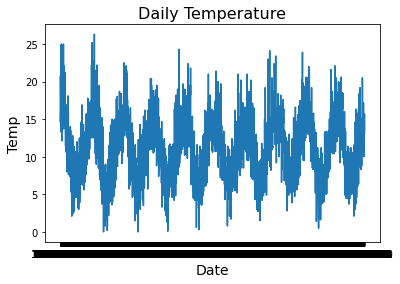

In [18]:
plt.plot(df['Date'], df['Temp'])
plt.title('Daily Temperature', fontsize = 16)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Temp', fontsize = 14)
plt.show()

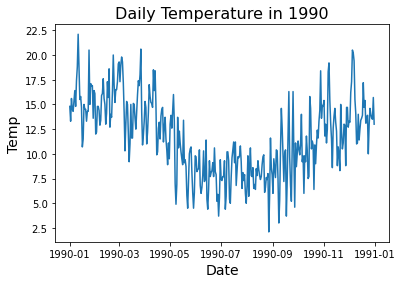

In [19]:
df['Date'] = pd.to_datetime(df['Date'])
bounds = ['1/1/1990', '12/31/1990']
bounds = pd.to_datetime(bounds)
d1 = df[(df['Date'] >= bounds[0]) & (df['Date'] <= bounds[1])]
plt.plot(d1['Date'], d1['Temp'])
plt.title('Daily Temperature in 1990', fontsize = 16)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Temp', fontsize = 14)
plt.show()

# **[Thực hành] Phân tích sự biến đổi số lượng đơn hàng theo thời gian**

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [21]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data-DataAnalyst-CodeGym/OnlineRetail.csv", encoding = "ISO-8859-1")

Lọc dữ liệu cần thiết cho mục tiêu 1.

In [22]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
d1 = df[['InvoiceNo', 'InvoiceDate']]
d1 = d1.drop_duplicates(subset = 'InvoiceNo', keep = 'first')
d1 = d1.set_index(['InvoiceDate'])
d2 = d1['2011']
d2 = d2.reset_index()
d3 = d2.groupby(by=d2['InvoiceDate'].dt.date).count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """


Vẽ biểu đồ đường.

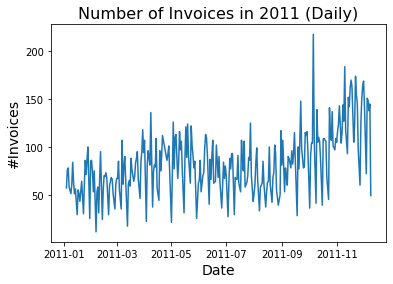

In [23]:
x = d3.index.get_level_values(0)
plt.plot(x, d3['InvoiceDate'])
plt.title('Number of Invoices in 2011 (Daily)', fontsize = 16)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('#Invoices', fontsize = 14)
plt.show()

Lấy dữ liệu cần thiết cho mục tiêu 2.

In [24]:
d4 = d2.groupby(by=d2['InvoiceDate'].dt.month).count()
print(d4)


             InvoiceDate  InvoiceNo
InvoiceDate                        
1                   1476       1476
2                   1393       1393
3                   1983       1983
4                   1744       1744
5                   2162       2162
6                   2012       2012
7                   1927       1927
8                   1737       1737
9                   2327       2327
10                  2637       2637
11                  3462       3462
12                  1015       1015


Vẽ biểu đồ cột so sánh số lượng đơn hàng trong mỗi tháng năm 2011

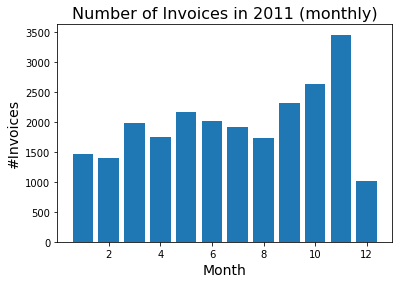

In [25]:
x = d4.index.get_level_values(0)
plt.bar(x, d4['InvoiceDate'])
plt.title('Number of Invoices in 2011 (monthly)', fontsize = 16)
plt.xlabel('Month', fontsize = 14)
plt.ylabel('#Invoices', fontsize = 14)
plt.show()